<a href="https://colab.research.google.com/github/emery1189/enrollment_visuals/blob/main/ohio_enrollment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Ohio Public School Enrollment Data

in this notebook, we will visualize student enrollment data from public school districts in Ohio.

the **Fall Enrollment (Headcount) - October 2023 Public District and Buildings** is available publiclly from the [Ohio Department of Education & Workforce](https://education.ohio.gov/Topics/Data/Frequently-Requested-Data/Enrollment-Data). we've downloaded this data and added it to our colab runtime.

the data is organized in an .xls file and contains three sheets we'll use: statewide numbers, numbers by district, and numbers by school.


## preprocessing

In [1]:
import pandas as pd

In [2]:
data_file = '/content/oct_hdcnt_fy24.xls'

notes = pd.read_excel(data_file,
                      sheet_name = 0,
                      index_col = None)

state = pd.read_excel(data_file,
                        sheet_name = 1,
                        index_col = None)

districts = pd.read_excel(data_file,
                          sheet_name = 2,
                          index_col = None)

schools = pd.read_excel(data_file,
                       sheet_name= 3,
                       index_col = None)

In [3]:
state

,PRESCHOOL,KINDERGARTEN,GRADE_1,GRADE_2,GRADE_3,GRADE_4,GRADE_5,GRADE_6,GRADE_7,GRADE_8,...,STUDENT_ECONDIS,STUDENT_WHITE,STUDENT_BLACK,STUDENT_LATINO,STUDENT_ASIAN,STUDENT_NATIVEAM,STUDENT_NATHAW,STUDENT_MULTI,STUDENT_FEMALE,STUDENT_MALE
0,59630,118173,119630,124292,117622,121068,122113,123497,132875,135080,...,903751,1160802,290727,135255,51102,2488,1807,109175,846701,904655


In [4]:
districts.head()

,DIST_IRN,DIST_NAME,COUNTY,PRESCHOOL,KINDERGARTEN,GRADE_1,GRADE_2,GRADE_3,GRADE_4,GRADE_5,...,STUDENT_ECONDIS,STUDENT_WHITE,STUDENT_BLACK,STUDENT_LATINO,STUDENT_ASIAN,STUDENT_NATIVEAM,STUDENT_NATHAW,STUDENT_MULTI,STUDENT_FEMALE,STUDENT_MALE
0,442,Manchester Local,Adams,21,49,42,46,47,46,40,...,575,668,<10,<10,0,0,0,10,333,356
1,43489,Akron City,Summit,587,1528,1497,1706,1385,1616,1548,...,19992,5177,9415,1428,1832,14,24,2102,9719,10273
2,43497,Alliance City,Stark,232,191,209,179,198,209,212,...,2933,1993,317,121,<10,<10,0,486,1408,1525
3,43505,Ashland City,Ashland,118,205,217,233,227,244,228,...,1072,2766,33,84,21,<10,<10,133,1447,1595
4,43513,Ashtabula Area City,Ashtabula,128,208,197,213,181,234,191,...,2853,1595,185,638,<10,<10,<10,448,1364,1517


In [5]:
schools.head()

,DIST_IRN,DIST_NAME,BLDG_IRN,BLDG_NAME,COUNTY,PRESCHOOL,KINDERGARTEN,GRADE_1,GRADE_2,GRADE_3,...,STUDENT_ECONDIS,STUDENT_WHITE,STUDENT_BLACK,STUDENT_LATINO,STUDENT_ASIAN,STUDENT_NATIVEAM,STUDENT_NATHAW,STUDENT_MULTI,STUDENT_FEMALE,STUDENT_MALE
0,442,Manchester Local,450,Manchester High School,Adams,0,0,0,0,0,...,322,339,<10,<10,0,0,0,<10,172,177
1,442,Manchester Local,451,Manchester Elementary School,Adams,21,49,42,46,47,...,253,329,<10,<10,0,0,0,<10,161,179
2,43489,Akron City,363,Akron Alternative Academy,Summit,0,0,0,0,0,...,115,23,66,<10,<10,0,0,<10,48,67
3,43489,Akron City,1537,Barber Community Learning Center,Summit,39,30,38,61,29,...,273,64,137,26,17,<10,0,28,127,146
4,43489,Akron City,2634,Betty Jane Community Learning Center,Summit,0,63,51,73,55,...,336,190,86,10,<10,<10,0,42,148,188


In [6]:
notes

,Unnamed: 0
0,This data represents a headcount of students i...
1,This data is NOT equivalent to the ADM (averag...
2,All data that represents less than 10 students...


per data notes ⬆️, schools/districts with fewer than ten students in any category contain values of "<10" for student privacy reasons.

we'll replace any "<10" values with 5.

In [7]:
state.replace('<10', 5, inplace=True)
districts.replace('<10', 5, inplace=True)
schools.replace('<10', 5, inplace=True)

In [8]:
state.columns

Index(['PRESCHOOL', 'KINDERGARTEN', 'GRADE_1', 'GRADE_2', 'GRADE_3', 'GRADE_4',
       'GRADE_5', 'GRADE_6', 'GRADE_7', 'GRADE_8', 'GRADE_9', 'GRADE_10',
       'GRADE_11', 'GRADE_12', 'GRADE_OTHER', 'STUDENT_W_DISABILITY',
       'STUDENT_EL', 'STUDENT_ECONDIS', 'STUDENT_WHITE', 'STUDENT_BLACK',
       'STUDENT_LATINO', 'STUDENT_ASIAN', 'STUDENT_NATIVEAM', 'STUDENT_NATHAW',
       'STUDENT_MULTI', 'STUDENT_FEMALE', 'STUDENT_MALE'],
      dtype='object')

making columns numeric.

In [9]:
columns_to_convert = ['PRESCHOOL', 'KINDERGARTEN', 'GRADE_1', 'GRADE_2', 'GRADE_3', 'GRADE_4',
                      'GRADE_5', 'GRADE_6', 'GRADE_7', 'GRADE_8', 'GRADE_9', 'GRADE_10',
                      'GRADE_11', 'GRADE_12', 'GRADE_OTHER', 'STUDENT_W_DISABILITY',
                      'STUDENT_EL', 'STUDENT_ECONDIS', 'STUDENT_WHITE', 'STUDENT_BLACK',
                      'STUDENT_LATINO', 'STUDENT_ASIAN', 'STUDENT_NATIVEAM', 'STUDENT_NATHAW',
                      'STUDENT_MULTI', 'STUDENT_FEMALE', 'STUDENT_MALE']

# to numeric
state[columns_to_convert] = state[columns_to_convert].apply(pd.to_numeric, errors = 'coerce')
districts[columns_to_convert] = districts[columns_to_convert].apply(pd.to_numeric, errors='coerce')
schools[columns_to_convert] = schools[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
# creating a STUDENT_TOTAL column

state['STUDENT_TOTAL'] = state['STUDENT_FEMALE'] + state['STUDENT_MALE']
districts['STUDENT_TOTAL'] = districts['STUDENT_FEMALE'] + districts['STUDENT_MALE']
schools['STUDENT_TOTAL'] = schools['STUDENT_FEMALE'] + schools['STUDENT_MALE']

In [11]:
# creating columns for percentages

# student groups list
student_groups = ['STUDENT_WHITE', 'STUDENT_BLACK', 'STUDENT_LATINO', 'STUDENT_ASIAN',
                  'STUDENT_NATIVEAM', 'STUDENT_NATHAW', 'STUDENT_MULTI']

# percentage of each student group compared to the total student population
for group in student_groups:
    state[f'{group}_PERCENTAGE'] = round(state[group] / state['STUDENT_TOTAL'] * 100, 1)
    districts[f'{group}_PERCENTAGE'] = round(districts[group] / districts['STUDENT_TOTAL'] * 100, 1)
    schools[f'{group}_PERCENTAGE'] = round(schools[group] / schools['STUDENT_TOTAL'] * 100, 1)

In [12]:
districts.head()

,DIST_IRN,DIST_NAME,COUNTY,PRESCHOOL,KINDERGARTEN,GRADE_1,GRADE_2,GRADE_3,GRADE_4,GRADE_5,...,STUDENT_FEMALE,STUDENT_MALE,STUDENT_TOTAL,STUDENT_WHITE_PERCENTAGE,STUDENT_BLACK_PERCENTAGE,STUDENT_LATINO_PERCENTAGE,STUDENT_ASIAN_PERCENTAGE,STUDENT_NATIVEAM_PERCENTAGE,STUDENT_NATHAW_PERCENTAGE,STUDENT_MULTI_PERCENTAGE
0,442,Manchester Local,Adams,21,49,42,46,47,46,40,...,333,356,689,97.0,0.7,0.7,0.0,0.0,0.0,1.5
1,43489,Akron City,Summit,587,1528,1497,1706,1385,1616,1548,...,9719,10273,19992,25.9,47.1,7.1,9.2,0.1,0.1,10.5
2,43497,Alliance City,Stark,232,191,209,179,198,209,212,...,1408,1525,2933,68.0,10.8,4.1,0.2,0.2,0.0,16.6
3,43505,Ashland City,Ashland,118,205,217,233,227,244,228,...,1447,1595,3042,90.9,1.1,2.8,0.7,0.2,0.2,4.4
4,43513,Ashtabula Area City,Ashtabula,128,208,197,213,181,234,191,...,1364,1517,2881,55.4,6.4,22.1,0.2,0.2,0.2,15.6


## Total Student Enrollment by District and Building (Treemap)

In [20]:
import plotly.express as px

In [21]:
district_building_student_count = schools.groupby(['DIST_NAME', 'BLDG_NAME']).sum().reset_index()

fig = px.treemap(district_building_student_count, path=['DIST_NAME', 'BLDG_NAME'],
                 values='STUDENT_TOTAL',
                 title='Total Student Enrollment by District and Building')

fig.show()

### using Dash to create an HTML Treemap

In [22]:
%%capture
!pip install dash

In [23]:
from dash import Dash, dcc, html
import plotly.express as px
from base64 import b64encode
import io

app = Dash(__name__)

buffer = io.StringIO()

fig = px.treemap(district_building_student_count, path=['DIST_NAME', 'BLDG_NAME'],
                 values='STUDENT_TOTAL',
                 title='Total Student Enrollment by District and Building')
fig.write_html(buffer)

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()

app.layout = html.Div([
    html.H4('Total Student Enrollment by District and Building'),
    dcc.Graph(id="graph", figure=fig)
])


app.run_server(debug=True)

<IPython.core.display.Javascript object>

## Columbus City Schools District Student Enrollment by School Type and Building (Treemap)

In [26]:
columbus_schools = schools[schools['DIST_NAME'] == 'Columbus City Schools District']

# set default SCHOOL_GROUP to other
columbus_schools['SCHOOL_GROUP'] = 'other'

# elementary schools (5 or more grade_1 students)
columbus_schools.loc[columbus_schools['GRADE_1'] >= 5, 'SCHOOL_GROUP'] = 'Elementary'

# middle schools (5 or more grade_6 students)
columbus_schools.loc[columbus_schools['GRADE_6'] >= 5, 'SCHOOL_GROUP'] = 'Middle'

# high schools: (5 or more grade_9 students)
columbus_schools.loc[columbus_schools['GRADE_9'] >= 5, 'SCHOOL_GROUP'] = 'High'

# group by SCHOOL_GROUP
grouped_schools = columbus_schools.groupby(['SCHOOL_GROUP', 'BLDG_NAME']).sum().reset_index()

fig = px.treemap(grouped_schools, path=['SCHOOL_GROUP', 'BLDG_NAME'],
                 values='STUDENT_TOTAL',
                 title='Total Student Enrollment by School Group and Building (Columbus City Schools District)')

fig.show()

<ipython-input-26-32b0ffc6c7eb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Dash version

In [27]:
app = Dash(__name__)

buffer = io.StringIO()

fig = px.treemap(grouped_schools, path=['SCHOOL_GROUP', 'BLDG_NAME'],
                 values='STUDENT_TOTAL',
                 title='Total Student Enrollment by School Group and Building (Columbus City Schools District)')
fig.write_html(buffer)

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()

app.layout = html.Div([
    html.H4('Total Student Enrollment by School Group and Building (Columbus City Schools District)'),
    dcc.Graph(id="graph", figure=fig)
])


app.run_server(debug=True)

<IPython.core.display.Javascript object>

## Columbus City Schools District Student Enrollment by School Type and Building (Sunburst)

In [28]:
fig = px.sunburst(grouped_schools, path=['SCHOOL_GROUP', 'BLDG_NAME'],
                  values='STUDENT_TOTAL',
                  title='Total Student Enrollment by School Group and Building (Columbus City Schools District)')

fig.show()

### Dash version

In [29]:
app = Dash(__name__)

buffer = io.StringIO()

fig = px.sunburst(grouped_schools, path=['SCHOOL_GROUP', 'BLDG_NAME'],
                  values='STUDENT_TOTAL',
                  title='Total Student Enrollment by School Group and Building (Columbus City Schools District)')

fig.write_html(buffer)

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()

app.layout = html.Div([
    html.H4('Total Student Enrollment by School Group and Building (Columbus City Schools District)'),
    dcc.Graph(id="graph", figure=fig)
])


app.run_server(debug=True)

<IPython.core.display.Javascript object>

## Percentage Distribution of Student Groups, State of Ohio (Pie Chart)

In [30]:
percentage_columns = ['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                      'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                      'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                      'STUDENT_MULTI_PERCENTAGE']

df_for_pie_chart = pd.DataFrame({
    'student_group': percentage_columns,
    'percentage': state[percentage_columns].values.flatten()
})

# pie chart
fig = px.pie(df_for_pie_chart, values='percentage', names='student_group',
             title='Percentage Distribution of Student Groups, State of Ohio')

fig.show()

## Comparing District Student Groups to State Student Groups (2 Pie Charts)

In [32]:
import matplotlib.pyplot as plt

In [33]:
def compare_district_to_state(district_name):
    district_df = districts
    state_df = state
    district_data = district_df[district_df['DIST_NAME'] == district_name]

    # district
    district_percentages = district_data[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                          'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                          'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                          'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # state
    state_percentages = state_df[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                   'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                   'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                   'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # colors
    colors = ['#EBE76C', '#6AD4DD', '#F0B86E', '#ED7B7B', '#836096', '#C6EBC5', '#B3A398']

    # pie chart district
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].pie(district_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[0].set_title(f"{district_name} District")

    # pie chart state
    axes[1].pie(state_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[1].set_title('State of Ohio')

    # equal aspect ratio
    axes[0].axis('equal')
    axes[1].axis('equal')

    # legend
    fig.legend(state_percentages.index, loc='lower right')

    # background color
    fig.patch.set_facecolor('#C2C2C2')

    plt.suptitle("Comparison of District to State Student Ethnicity Percentage", fontsize=16)
    plt.show()

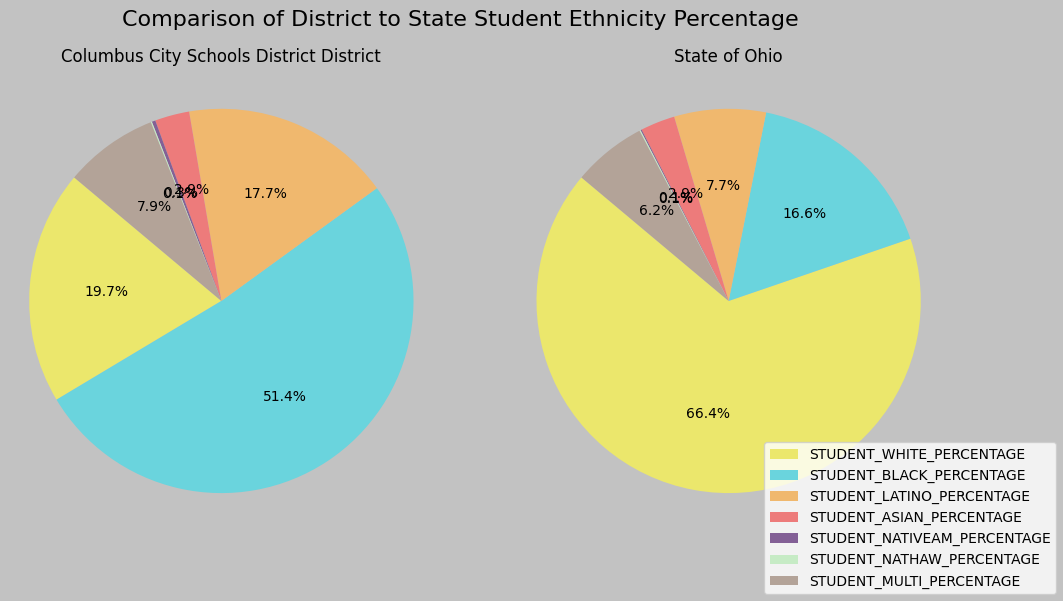

In [34]:
compare_district_to_state('Columbus City Schools District')

In [35]:
import random

list_of_districts = [district for district in districts.DIST_NAME]
list_of_schools = [school for school in schools.BLDG_NAME]

len(list_of_districts), len(list_of_schools)

(609, 3146)

### random examples

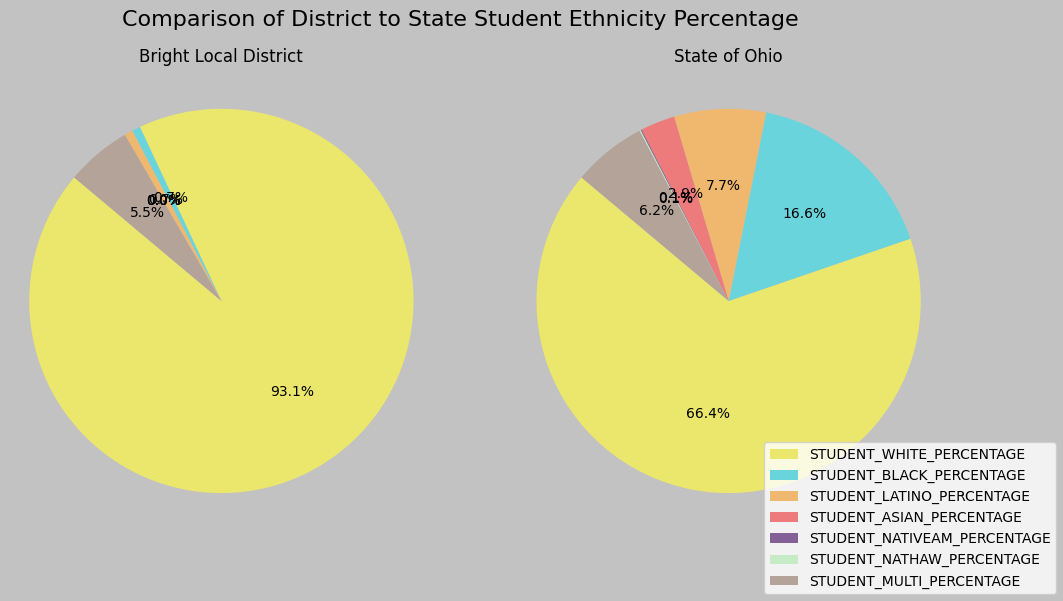

In [36]:
compare_district_to_state(random.choice(list_of_districts))

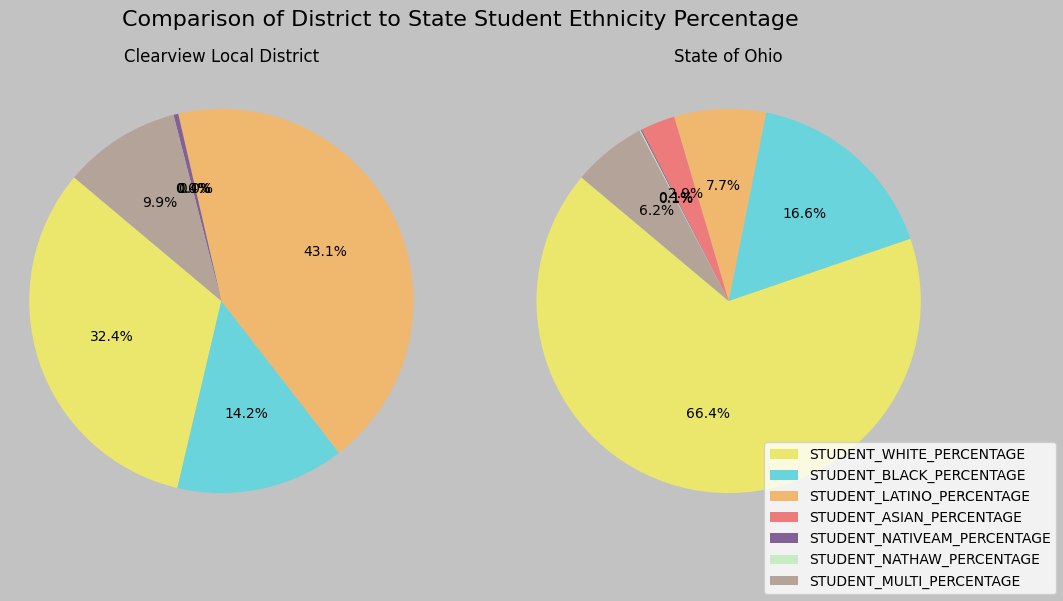

In [37]:
compare_district_to_state(random.choice(list_of_districts))

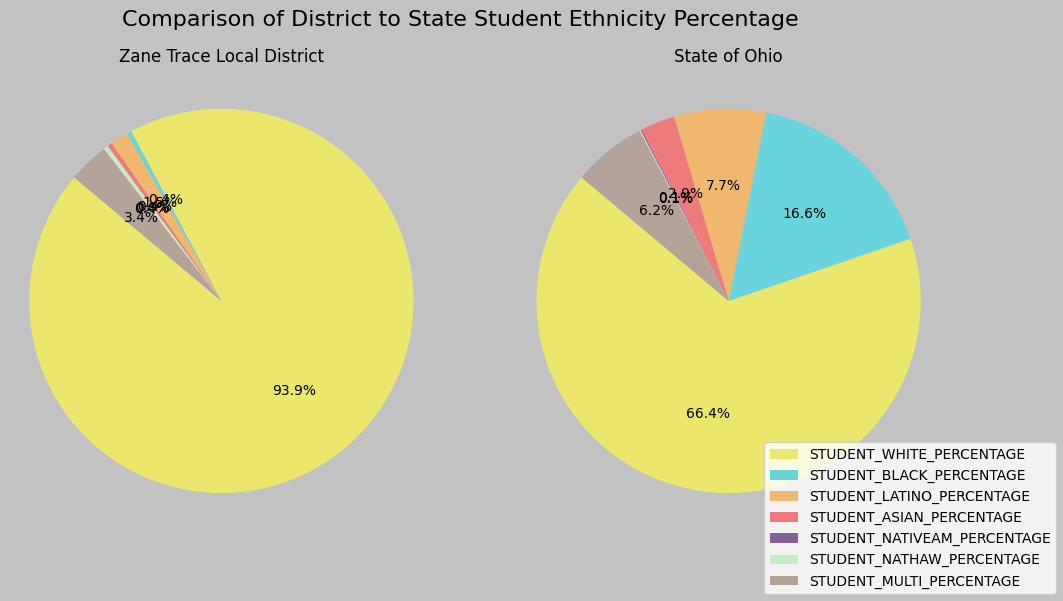

In [38]:
compare_district_to_state(random.choice(list_of_districts))

## Comparing Individual School Student Groups to State Student Groups

In [39]:
def compare_school_to_state(school_name):
    school_df = schools
    state_df = state
    school_data = school_df[school_df['BLDG_NAME'] == school_name]

    # school
    school_percentages = school_data[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                      'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                      'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                      'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # state
    state_percentages = state_df[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                   'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                   'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                   'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # colors
    colors = ['#EBE76C', '#6AD4DD', '#F0B86E', '#ED7B7B', '#836096', '#C6EBC5', '#B3A398']

    # pie chart school
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].pie(school_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[0].set_title(f"{school_name}")

    # pie chart state
    axes[1].pie(state_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[1].set_title('State of Ohio')

    # equal aspect ratio
    axes[0].axis('equal')
    axes[1].axis('equal')

    # legend
    fig.legend(state_percentages.index, loc='lower right')

    # background color
    fig.patch.set_facecolor('#C2C2C2')

    plt.suptitle("Comparison of School to State Student Ethnicity Percentage", fontsize=16)
    plt.show()

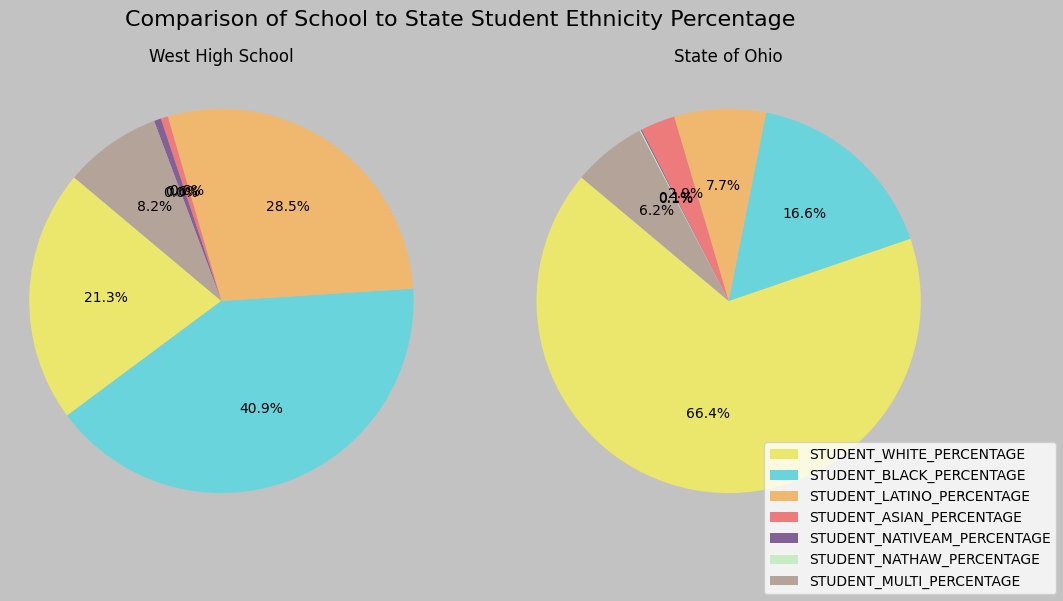

In [40]:
compare_school_to_state('West High School')

### random examples

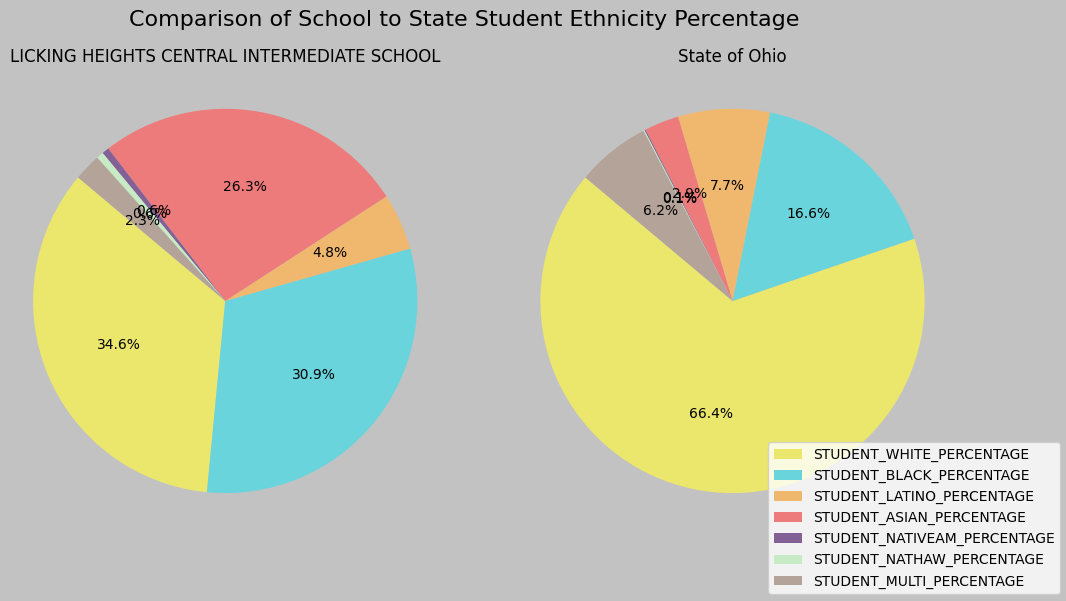

In [41]:
compare_school_to_state(random.choice(list_of_schools))

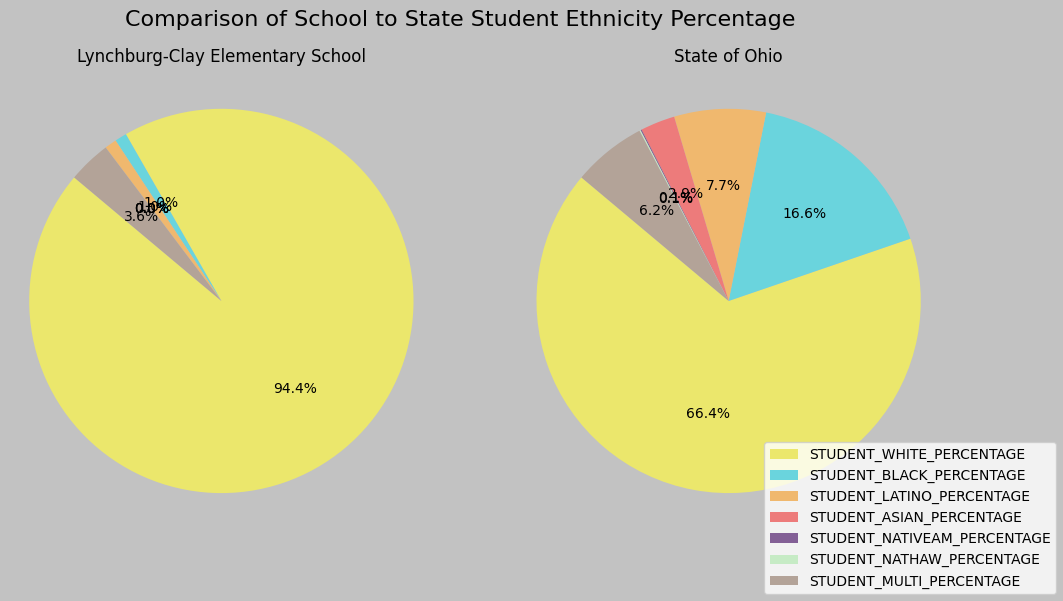

In [42]:
compare_school_to_state(random.choice(list_of_schools))

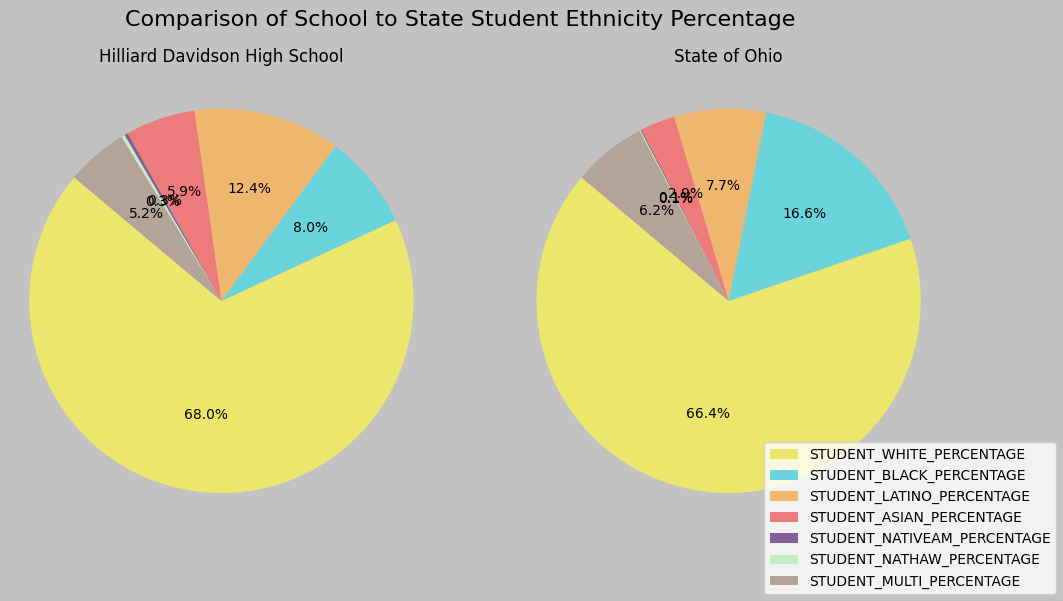

In [43]:
compare_school_to_state(random.choice(list_of_schools))

## Comparing Individial School Student Groups to District and State Student Groups (3 Pie Charts)

In [44]:
def compare_school_to_district_and_state(school_name):
    school_df = schools
    state_df = state
    district_df = districts
    school_data = school_df[school_df['BLDG_NAME'] == school_name]
    district_name = school_data['DIST_NAME'].iloc[0]
    district_data = district_df[district_df['DIST_NAME'] == district_name]


    # district
    district_percentages = district_data[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                          'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                          'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                          'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # school
    school_percentages = school_data[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                      'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                      'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                      'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # state
    state_percentages = state_df[['STUDENT_WHITE_PERCENTAGE', 'STUDENT_BLACK_PERCENTAGE',
                                   'STUDENT_LATINO_PERCENTAGE', 'STUDENT_ASIAN_PERCENTAGE',
                                   'STUDENT_NATIVEAM_PERCENTAGE', 'STUDENT_NATHAW_PERCENTAGE',
                                   'STUDENT_MULTI_PERCENTAGE']].iloc[0]

    # colors
    colors = ['#EBE76C', '#6AD4DD', '#F0B86E', '#ED7B7B', '#836096', '#C6EBC5', '#B3A398']

    # pie chart school
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].pie(school_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[0].set_title(f"{school_name}")

    # pie chart district
    axes[1].pie(district_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[1].set_title(f"{district_name} District")

    # pie chart state
    axes[2].pie(state_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[2].set_title('State of Ohio')

    # equal aspect ratio
    for ax in axes:
        ax.axis('equal')

    # legend
    fig.legend(state_percentages.index, loc='lower right')

    # background color
    fig.patch.set_facecolor('#C2C2C2')

    plt.suptitle("Comparison of School to District to State Student Ethnicity Percentage", fontsize=20)
    plt.show()

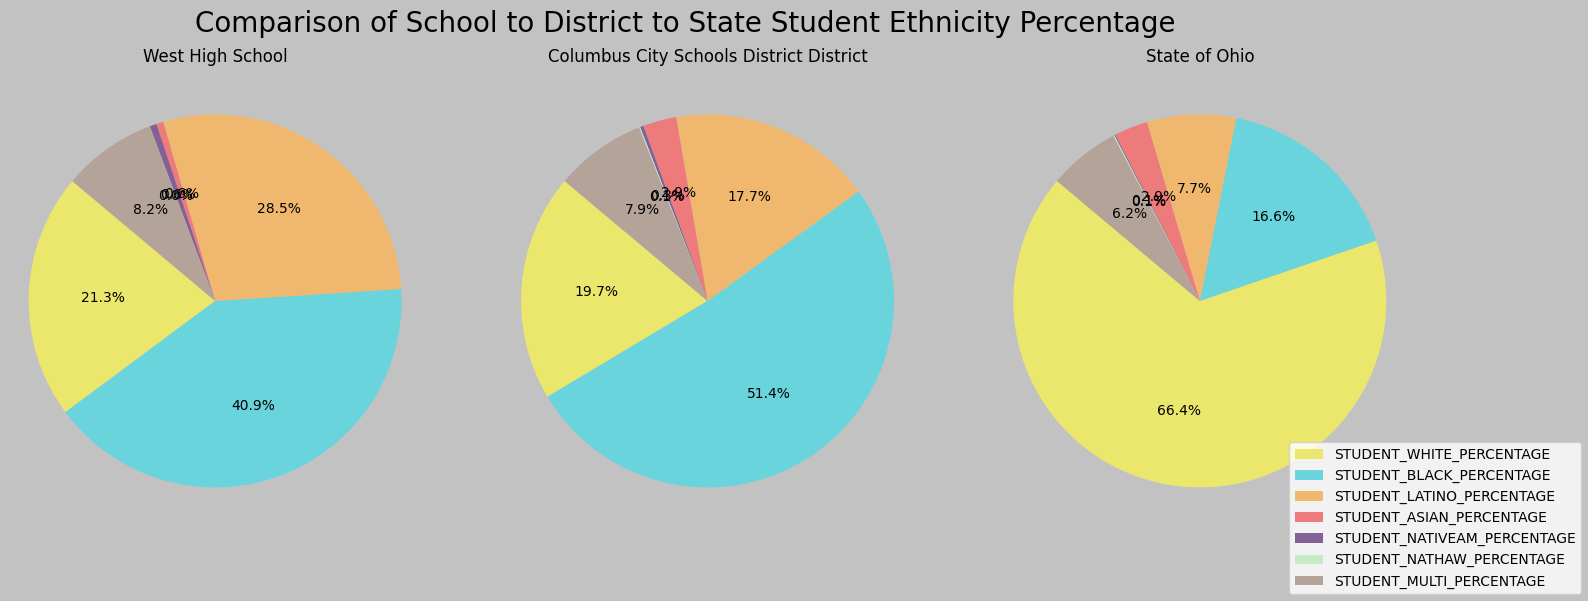

In [45]:
compare_school_to_district_and_state('West High School')

### random examples

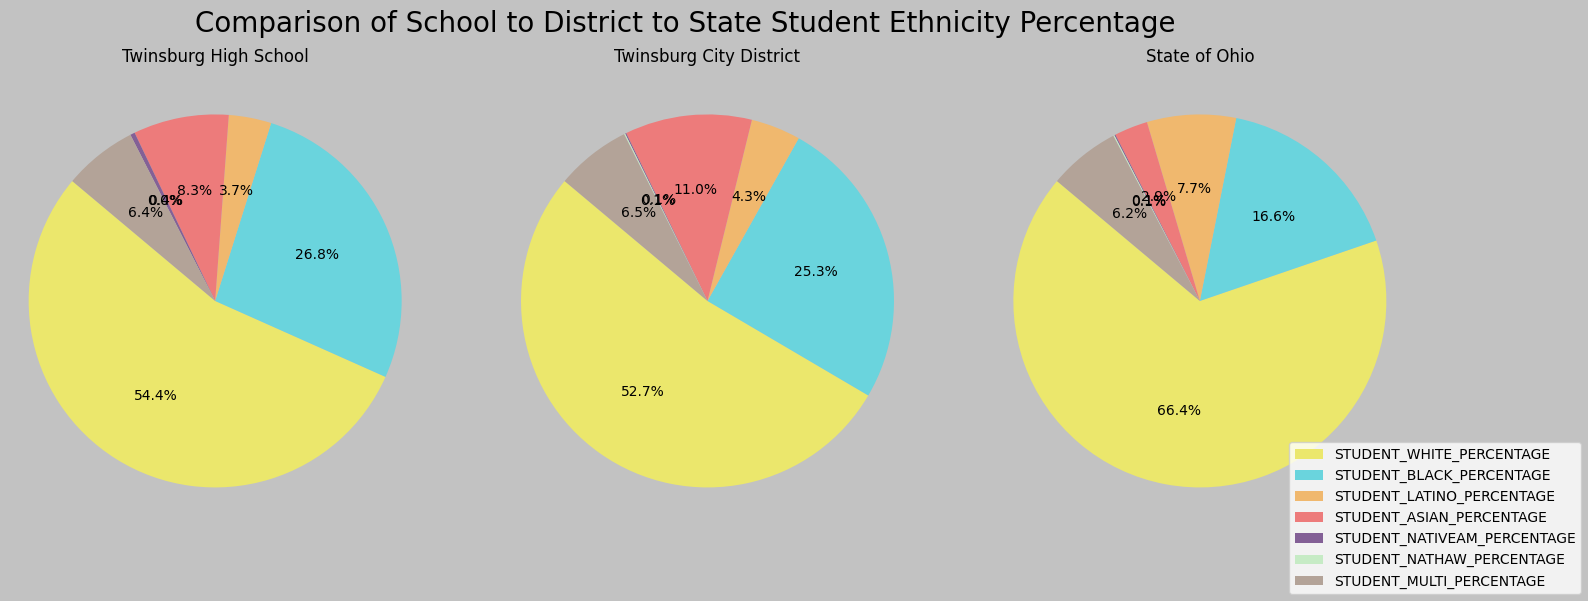

In [46]:
compare_school_to_district_and_state(random.choice(list_of_schools))

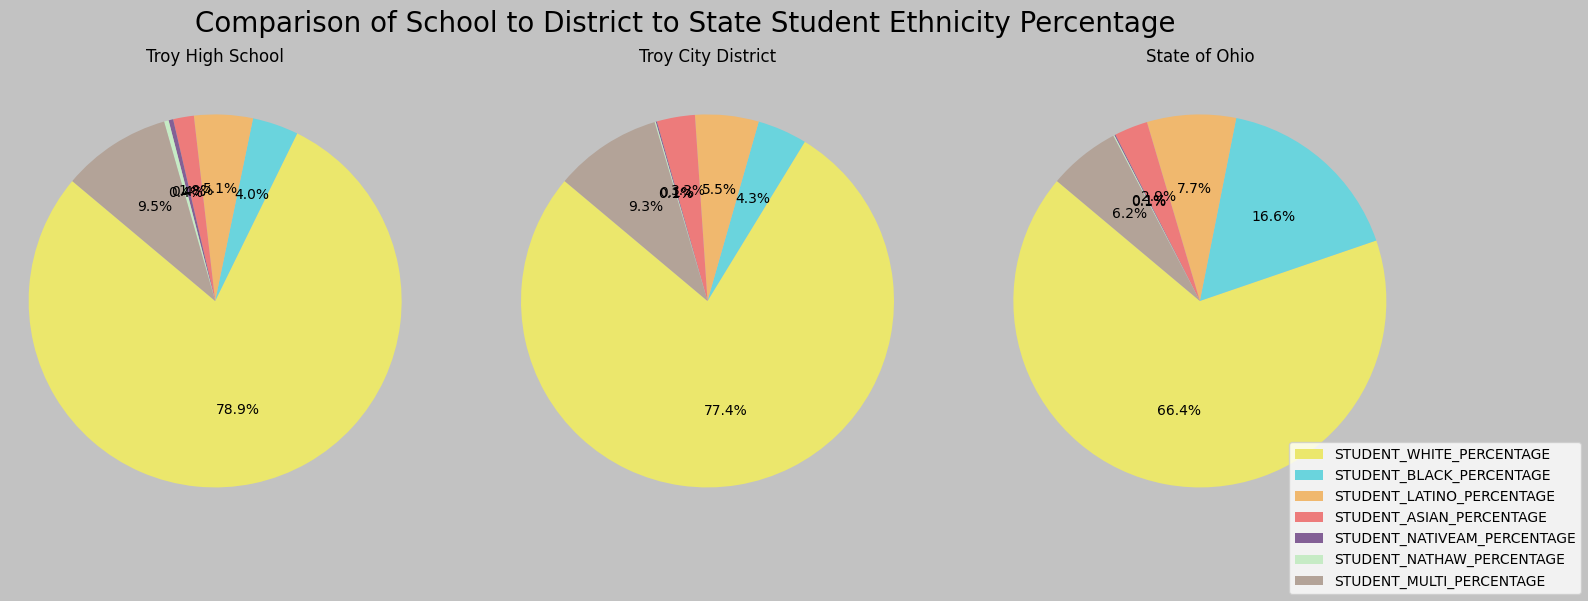

In [50]:
compare_school_to_district_and_state(random.choice(list_of_schools))